In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [23]:
nubb = []

files = sorted(glob.glob("/Users/mistryk2/OneDrive - UT Arlington/Code/ATPC/job/test/*.h5"))

for f in files:
    df = pd.read_hdf(f, "MC/hits")
    nubb.append(df)

nubb = pd.concat(nubb)
display(nubb)

,event_id,x,y,z,energy
0,102500,481.434143,1024.615601,1147.059814,0.029438
1,102500,483.762848,1027.926758,1151.510376,0.038366
2,102500,484.152252,1030.586792,1153.222290,0.022394
3,102500,484.895844,1032.454468,1155.490967,0.048856
4,102500,486.415466,1033.761108,1157.631226,0.003794
...,...,...,...,...,...
5847,3247609,181.016953,-634.278259,2368.327881,0.011631
5848,3247609,189.393158,-623.467529,2368.708252,0.003125
5849,3247609,190.089462,-624.205566,2368.765869,0.278107
5850,3247609,199.400131,-632.042847,2369.087158,0.068200


In [24]:
print(len(nubb.event_id.unique()))

21749


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_90104/95807793.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 0, 'Energy [MeV]')

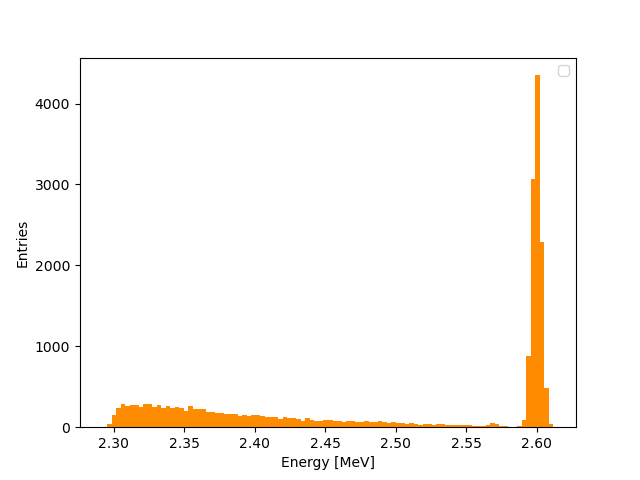

In [25]:
%matplotlib widget
# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = nubb.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')


plt.figure()

plt.hist(hit_tot_energy.hit_tot_energy, bins=100, color=['darkorange']);

plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")


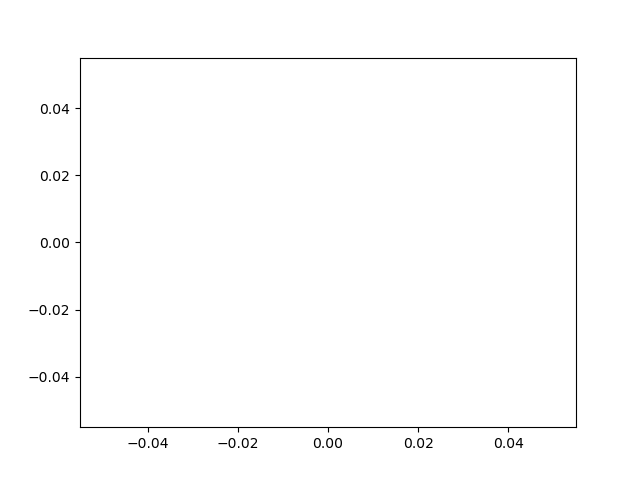

In [26]:
event = nubb[nubb.event_id == 50]

plt.figure()

plt.scatter(event.x, event.y)